In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

from tensorflow.keras.optimizers import SGD

from keras.models import Sequential, load_model
from keras.layers import Dense

from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from os.path import exists
import datetime

In [2]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [3]:
# Load moons data
X,y = make_moons(n_samples=2000, noise=0.1)
print(X)

[[ 0.65277679  0.56640848]
 [ 0.28492177 -0.25652947]
 [-0.17919274  0.938596  ]
 ...
 [ 1.27083757 -0.39228267]
 [ 0.72732722 -0.51835592]
 [ 0.49290678  1.02601557]]


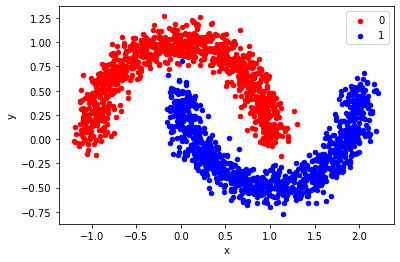

In [4]:
# Plot the moons data points
df = pd.DataFrame(dict(x=X[:,0],y=X[:,1],label=y))
colors = {0:'red', 1: 'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter',x='x', y='y', label=key, color=colors[key])

In [5]:
print(df)

             x         y  label
0     0.652777  0.566408      0
1     0.284922 -0.256529      1
2    -0.179193  0.938596      0
3    -0.041860  1.129356      0
4     0.737321  0.659941      0
...        ...       ...    ...
1995  1.875405  0.435099      1
1996  1.081926 -0.400663      1
1997  1.270838 -0.392283      1
1998  0.727327 -0.518356      1
1999  0.492907  1.026016      0

[2000 rows x 3 columns]


In [6]:
#X and y for the model
x_model = df[['x','y']]
y_model = df.label

In [7]:
print(x_model)

             x         y
0     0.652777  0.566408
1     0.284922 -0.256529
2    -0.179193  0.938596
3    -0.041860  1.129356
4     0.737321  0.659941
...        ...       ...
1995  1.875405  0.435099
1996  1.081926 -0.400663
1997  1.270838 -0.392283
1998  0.727327 -0.518356
1999  0.492907  1.026016

[2000 rows x 2 columns]


In [8]:
print(y_model)

0       0
1       1
2       0
3       0
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    0
Name: label, Length: 2000, dtype: int64


In [9]:
# Create MLP
def create_model(lr_rate):
    model = Sequential()
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    opt = SGD(learning_rate=lr_rate)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [10]:
# Logistic regression function 
def logistic_regression(name, lr_rate, batch):
    
    #Tensorboard
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True, update_freq='epoch')
    
    #Checkpoint
    chekpoint_path= name + ".Q4.weights.best.hdf5"
    checkpoint = ModelCheckpoint(chekpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    
    callbacks = [tensorboard, checkpoint]
    
    if exists(chekpoint_path):
        # Load model
        model = load_model(chekpoint_path)
        # Finding the epoch index from which we are resuming
        initial_epoch = 0
    else:
        model = create_model(lr_rate)
        initial_epoch = 0
    
    # Fit the model
    x_train, x_test, y_train, y_test = train_test_split(x_model, y_model, test_size=0.33, random_state=1)
    model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch, epochs=100, callbacks=callbacks, initial_epoch=initial_epoch)
    
    return model, x_train, x_test, y_train, y_test

In [ ]:
model, xTrain, xTest, yTrain, yTest = logistic_regression("first", 0.01, 16)

In [12]:
# Print training accuracy & test accuracy
_, train_acc = model.evaluate(xTrain, yTrain, verbose=0)
_, test_acc = model.evaluate(xTest, yTest, verbose=0)
print('Train accuracy: %.3f, Test accuracy: %.3f' % (train_acc, test_acc))

Train accuracy: 0.894, Test accuracy: 0.911


In [ ]:
# Tweaking hyperparameters
model, xTrain, xTest, yTrain, yTest = logistic_regression("second", 0.01, 32)

In [14]:
# Print training accuracy & test accuracy
_, train_acc = model.evaluate(xTrain, yTrain, verbose=0)
_, test_acc = model.evaluate(xTest, yTest, verbose=0)
print('Train accuracy: %.3f, Test accuracy: %.3f' % (train_acc, test_acc))

Train accuracy: 0.890, Test accuracy: 0.895


In [ ]:
# Tweaking hyperparameters
model, xTrain, xTest, yTrain, yTest = logistic_regression("third", 0.05, 16)

In [16]:
# Print training accuracy & test accuracy
_, train_acc = model.evaluate(xTrain, yTrain, verbose=0)
_, test_acc = model.evaluate(xTest, yTest, verbose=0)
print('Train accuracy: %.3f, Test accuracy: %.3f' % (train_acc, test_acc))

Train accuracy: 0.996, Test accuracy: 0.997
